# Blitting 2d arrays

In [ ]:
from media_tools import *
import cv2

sample_media = "C:/Users/pdazeley-gaist23/PycharmProjects/Image_and_Audio_Generation_and_Editing_using_Python/sample_media/"
image = image_tools.read_image(sample_media + "student_guide.jpg")
chessboard = image_tools.read_image(sample_media + "chessboard.png")

Blitting is equivalent to pasting data from a source array onto a destination array at a given position. For images, it
may involve a consideration of transparency, or it may not, meaning that pasted data would overwrite the data covered by
the source image at on the destination image array.

**Important note:** Before you blit an array onto another, you must make sure that both arrays have the same number of channels, typically 1,
3, or 4.

We can blit an array onto another using the `data_tools` module's `blit()` function, from the `media_tools` package.

The `blit()` function takes a source array and a destination array as its arguments, as well as optional position `y` and `x`
parameters, and an optional `alpha` value between 0 and 1, which sets the overall transparency of the source array when
blitted onto the destination array.

**Example array blits:**

1. Blitting an array without an alpha channel:

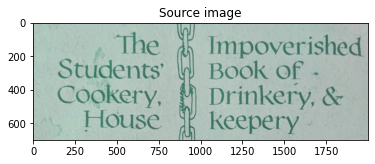

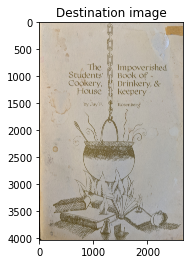

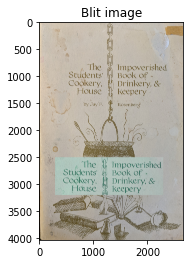

In [14]:
img_source = data_tools.roll_array(data_tools.crop_array(image, top_left=(700, 400), bottom_right=(1400, 2400)), shift=1, axes=2)
image_tools.show_image(img_source, axis=True, scale_ratio=1, title="Source image")
img_dest = image
image_tools.show_image(img_dest, axis=True, scale_ratio=1, title="Destination image")

displacement = (2500, 300)

img_blit = data_tools.blit(img_source, img_dest, *displacement)
image_tools.show_image(img_blit, axis=True, title="Blit image", scale_ratio=1)

Even when blitting an array without an alpha channel, you can set the transparency of the source array on the final blitted
array:

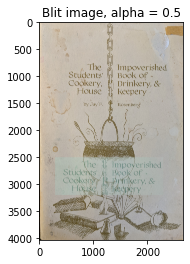

In [15]:
img_blit = data_tools.blit(img_source, img_dest, *displacement, alpha=0.5)
image_tools.show_image(img_blit, axis=True, title="Blit image, alpha = 0.5", scale_ratio=1)

2. Blitting an array with an alpha channel:

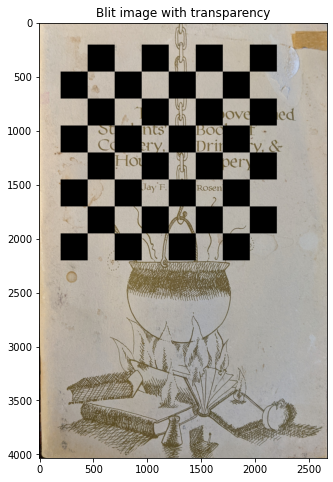

In [17]:
img_source = chessboard
# convert the rgb image to rgba
img_dest = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)
img_dest[:,:,3] = 255

# blit chessboard onto the destination
img_blit = data_tools.blit(img_source, img_dest, *(200, 200))
image_tools.show_image(img_blit, axis=True, title="Blit image with transparency")

If you so desire, you may specify an alpha value to affect the overall transparency of the source array on the destination
array, just as in the previous example:

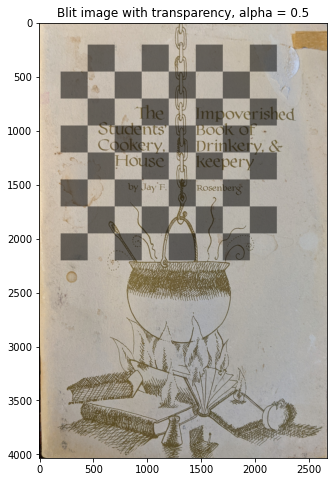

In [19]:
# blit chessboard onto the destination
img_blit = data_tools.blit(img_source, img_dest, *(200, 200), alpha=0.5)
image_tools.show_image(img_blit, axis=True, title="Blit image with transparency, alpha = 0.5")